In [19]:
import networkx as nx
from node2vec import Node2Vec
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def randomly_remove_links(G, n_missing):
    
    my_edges = np.array(list(G.edges))
    number_of_rows = my_edges.shape[0]
    rnd_idx = np.random.choice(number_of_rows,
                               size = n_missing,
                               replace = False)

    pair = my_edges[rnd_idx, :]
    
    for p in pair:
        G.remove_edge(p[0], p[1])

def get_representation(G, params):
    
    dimensions, walk_length, num_walks, workers,\
    window, min_count, batch_words = params
    
    n2v = Node2Vec(G,
                   dimensions = dimensions,
                   walk_length = walk_length,
                   num_walks = num_walks,
                   workers = workers,
                   )
    
    embedding = n2v.fit(window = window,
                        min_count = min_count,
                        batch_words = batch_words,
                        )
    
    
    representation = [] # maybe this should be an array, not a list?? if done, check here: [ ]
    n_node = G.number_of_nodes()
    
    for i in range(n_node):
        representation.append(embedding.wv['%d'%i])
        
    return representation

def calc_cosine_similarity(vec1, vec2):
    
    n = len(vec1)
    cos_sim = 0.
    
    for i in range(n):
        cos_sim += np.dot(vec1[i], vec2[i]) /\
        (np.linalg.norm(vec1[i]) * np.linalg.norm(vec2[i]))
    
    cos_sim /= n
    
    return cos_sim

def calc_euclidean_distance(vec1, vec2):
    
    n = len(vec1)
    euc_dist = 0.
    
    for i in range(n):
        euc_dist += np.linalg.norm(vec1[i] - vec2[i])
    
    euc_dist /= n
    
    return euc_dist
    

# Workflow

In [4]:
'''
Parameters
'''
n_node = 1000 # size of ring lattice
n_missing = 10 # number of missing edges

dimensions = 128 # euclidean dimension to embedd
walk_length = 30 # number of nodes in each walk
num_walks = 100 # number of walks per node
workers = 10 # for cpu parallel work

window = 10 # Maximum distance between the current and predicted word within a sentence.
min_count = 1 #ignores all words with total frequency lower than this
batch_words = 4

repeat = 100

'''
Build network
'''

ring_lattice = nx.cycle_graph(n_node)
ring_missing = nx.cycle_graph(n_node)
randomly_remove_links(ring_missing, n_missing)



'''
Get vector representation
'''

param = [dimensions, walk_length, num_walks, workers,
        window, min_count, batch_words]

list_dist_control = []
list_cosim_control = []
list_dist_exp = []
list_cosim_exp = []
for i in range(repeat):
    print(f'{i}-th iteration')
    rep_ring = get_representation(ring_lattice, param)
    rep_ring_cont = get_representation(ring_lattice, param)
    rep_ring_exp = get_representation(ring_missing, param)

    '''
    Calcualte euclidean distance
    '''
    
    dist_control = calc_euclidean_distance(rep_ring, rep_ring_cont)
    cosim_control = calc_cosine_similarity(rep_ring, rep_ring_cont)

    dist_exp = calc_euclidean_distance(rep_ring, rep_ring_exp)
    cosim_exp = calc_cosine_similarity(rep_ring, rep_ring_exp)
    
    #############################################
    # NEED TO SAVE INDIVIDUAL DISTANCES btw same nodes HERE
    #############################################
    
    list_dist_control.append(dist_control)
    list_cosim_control.append(cosim_control)
    list_dist_exp.append(dist_exp)
    list_cosim_exp.append(cosim_exp)
    
    #############################################
    # NEED TO SAVE avg DISTANCES
    #############################################


network construction finished!
0-th iteration


Generating walks (CPU: 10): 100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


1-th iteration


Generating walks (CPU: 3): 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


2-th iteration


Generating walks (CPU: 4): 100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


3-th iteration


Generating walks (CPU: 2): 100%|██████████| 10/10 [00:11<00:00,  1.11s/it]


4-th iteration


Generating walks (CPU: 2): 100%|██████████| 10/10 [00:11<00:00,  1.12s/it]


5-th iteration


Generating walks (CPU: 2): 100%|██████████| 10/10 [00:11<00:00,  1.11s/it]


6-th iteration


Generating walks (CPU: 3): 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


7-th iteration


Generating walks (CPU: 2): 100%|██████████| 10/10 [00:11<00:00,  1.12s/it]


8-th iteration


Generating walks (CPU: 2): 100%|██████████| 10/10 [00:11<00:00,  1.11s/it]


9-th iteration


Generating walks (CPU: 5): 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


10-th iteration


Generating walks (CPU: 3): 100%|██████████| 10/10 [00:11<00:00,  1.14s/it]


11-th iteration


Generating walks (CPU: 4): 100%|██████████| 10/10 [00:10<00:00,  1.09s/it]


12-th iteration


Generating walks (CPU: 4): 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


13-th iteration


Generating walks (CPU: 4): 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


14-th iteration


Generating walks (CPU: 5): 100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


15-th iteration


Generating walks (CPU: 4): 100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


16-th iteration


Generating walks (CPU: 4): 100%|██████████| 10/10 [00:10<00:00,  1.07s/it]


17-th iteration


Generating walks (CPU: 6): 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


18-th iteration


Generating walks (CPU: 4): 100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


19-th iteration


Generating walks (CPU: 9): 100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


20-th iteration


Generating walks (CPU: 4): 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


21-th iteration


Generating walks (CPU: 4): 100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


22-th iteration


Generating walks (CPU: 4): 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


23-th iteration


Generating walks (CPU: 7): 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


24-th iteration


Generating walks (CPU: 4): 100%|██████████| 10/10 [00:11<00:00,  1.14s/it]


25-th iteration


Generating walks (CPU: 9): 100%|██████████| 10/10 [00:10<00:00,  1.04s/it]


26-th iteration


Generating walks (CPU: 4): 100%|██████████| 10/10 [00:11<00:00,  1.14s/it]


27-th iteration


Generating walks (CPU: 5): 100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


28-th iteration


Generating walks (CPU: 4): 100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


29-th iteration


Generating walks (CPU: 4): 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


30-th iteration


Generating walks (CPU: 4): 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


31-th iteration


Generating walks (CPU: 6): 100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


32-th iteration


Generating walks (CPU: 10): 100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


33-th iteration


Generating walks (CPU: 5): 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


34-th iteration


Generating walks (CPU: 5): 100%|██████████| 10/10 [00:11<00:00,  1.14s/it]


35-th iteration


Generating walks (CPU: 10): 100%|██████████| 10/10 [00:10<00:00,  1.03s/it]


36-th iteration


Generating walks (CPU: 5): 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


37-th iteration


Generating walks (CPU: 9): 100%|██████████| 10/10 [00:11<00:00,  1.10s/it]


38-th iteration


Generating walks (CPU: 5): 100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


39-th iteration


Generating walks (CPU: 5): 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


40-th iteration


Generating walks (CPU: 5): 100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


41-th iteration


Generating walks (CPU: 5): 100%|██████████| 10/10 [00:11<00:00,  1.14s/it]


42-th iteration


Generating walks (CPU: 7): 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


43-th iteration


Generating walks (CPU: 9): 100%|██████████| 10/10 [00:10<00:00,  1.02s/it]


44-th iteration


Generating walks (CPU: 10): 100%|██████████| 10/10 [00:10<00:00,  1.09s/it]


45-th iteration


Generating walks (CPU: 6): 100%|██████████| 10/10 [00:11<00:00,  1.14s/it]


46-th iteration


Generating walks (CPU: 8): 100%|██████████| 10/10 [00:11<00:00,  1.14s/it]


47-th iteration


Generating walks (CPU: 6): 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


48-th iteration


Generating walks (CPU: 6): 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


49-th iteration


Generating walks (CPU: 4): 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


50-th iteration


Generating walks (CPU: 6): 100%|██████████| 10/10 [00:10<00:00,  1.04s/it]


51-th iteration


Generating walks (CPU: 10): 100%|██████████| 10/10 [00:10<00:00,  1.10s/it]


52-th iteration


Generating walks (CPU: 9): 100%|██████████| 10/10 [00:10<00:00,  1.05s/it]


53-th iteration


Generating walks (CPU: 5): 100%|██████████| 10/10 [00:11<00:00,  1.12s/it]


54-th iteration


Generating walks (CPU: 4): 100%|██████████| 10/10 [00:11<00:00,  1.11s/it]


55-th iteration


Generating walks (CPU: 5): 100%|██████████| 10/10 [00:11<00:00,  1.14s/it]


56-th iteration


Generating walks (CPU: 6): 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


57-th iteration


Generating walks (CPU: 5): 100%|██████████| 10/10 [00:11<00:00,  1.12s/it]


58-th iteration


Generating walks (CPU: 7): 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


59-th iteration


Generating walks (CPU: 6): 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


60-th iteration


Generating walks (CPU: 4): 100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


61-th iteration


Generating walks (CPU: 9): 100%|██████████| 10/10 [00:11<00:00,  1.12s/it]


62-th iteration


Generating walks (CPU: 5): 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


63-th iteration


Generating walks (CPU: 3): 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


64-th iteration


Generating walks (CPU: 4): 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


65-th iteration


Generating walks (CPU: 6): 100%|██████████| 10/10 [00:10<00:00,  1.10s/it]


66-th iteration


Generating walks (CPU: 5): 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


67-th iteration


Generating walks (CPU: 9): 100%|██████████| 10/10 [00:11<00:00,  1.20s/it]


68-th iteration


Generating walks (CPU: 4): 100%|██████████| 10/10 [00:11<00:00,  1.14s/it]


69-th iteration


Generating walks (CPU: 7): 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


70-th iteration


Generating walks (CPU: 8): 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


71-th iteration


Generating walks (CPU: 4): 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


72-th iteration


Generating walks (CPU: 3): 100%|██████████| 10/10 [00:11<00:00,  1.12s/it]


73-th iteration


Generating walks (CPU: 4): 100%|██████████| 10/10 [00:11<00:00,  1.12s/it]


74-th iteration


Generating walks (CPU: 10): 100%|██████████| 10/10 [00:10<00:00,  1.04s/it]


75-th iteration


Generating walks (CPU: 8): 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


76-th iteration


Generating walks (CPU: 7): 100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


77-th iteration


Generating walks (CPU: 5): 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


78-th iteration


Generating walks (CPU: 7): 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


79-th iteration


Generating walks (CPU: 9): 100%|██████████| 10/10 [00:11<00:00,  1.14s/it]


80-th iteration


Generating walks (CPU: 10): 100%|██████████| 10/10 [00:10<00:00,  1.04s/it]


81-th iteration


Generating walks (CPU: 10): 100%|██████████| 10/10 [00:10<00:00,  1.06s/it]


82-th iteration


Generating walks (CPU: 9): 100%|██████████| 10/10 [00:11<00:00,  1.11s/it]


83-th iteration


Generating walks (CPU: 6): 100%|██████████| 10/10 [00:10<00:00,  1.07s/it]


84-th iteration


Generating walks (CPU: 8): 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


85-th iteration


Generating walks (CPU: 4): 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


86-th iteration


Generating walks (CPU: 5): 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


87-th iteration


Generating walks (CPU: 10): 100%|██████████| 10/10 [00:10<00:00,  1.02s/it]


88-th iteration


Generating walks (CPU: 9): 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


89-th iteration


Generating walks (CPU: 10): 100%|██████████| 10/10 [00:10<00:00,  1.02s/it]


90-th iteration


Generating walks (CPU: 7): 100%|██████████| 10/10 [00:10<00:00,  1.07s/it]


91-th iteration


Generating walks (CPU: 8): 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


92-th iteration


Generating walks (CPU: 5): 100%|██████████| 10/10 [00:10<00:00,  1.09s/it]


93-th iteration


Generating walks (CPU: 9): 100%|██████████| 10/10 [00:10<00:00,  1.02s/it]


94-th iteration


Generating walks (CPU: 10): 100%|██████████| 10/10 [00:11<00:00,  1.12s/it]


95-th iteration


Generating walks (CPU: 5): 100%|██████████| 10/10 [00:11<00:00,  1.12s/it]


96-th iteration


Generating walks (CPU: 8): 100%|██████████| 10/10 [00:11<00:00,  1.20s/it]


97-th iteration


Generating walks (CPU: 8): 100%|██████████| 10/10 [00:10<00:00,  1.08s/it]


98-th iteration


Generating walks (CPU: 10): 100%|██████████| 10/10 [00:11<00:00,  1.12s/it]


99-th iteration


Generating walks (CPU: 9): 100%|██████████| 10/10 [00:10<00:00,  1.05s/it]


(0.0, 20.0)

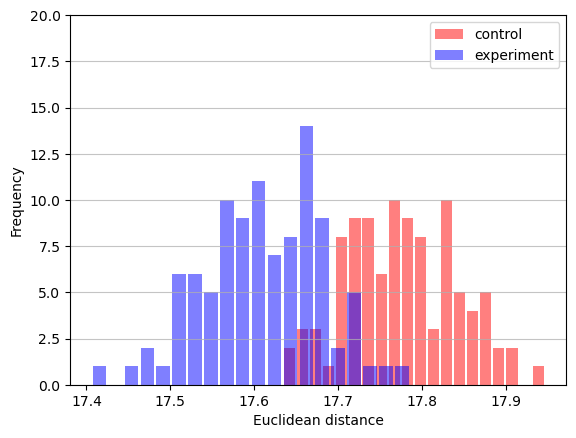

In [16]:
n, bins, patches = plt.hist(x = list_dist_control,
                            bins = 20, 
                            color = 'red',
                            alpha = 0.5, 
                            rwidth = 0.85,
                            label = 'control',
                            )

n, bins, patches = plt.hist(x = list_dist_exp,
                            bins = 20, 
                            color = 'blue',
                            alpha = 0.5, 
                            rwidth = 0.85,
                            label = 'experiment',
                            )

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Euclidean distance')
plt.ylabel('Frequency')
plt.legend()
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 20.0)

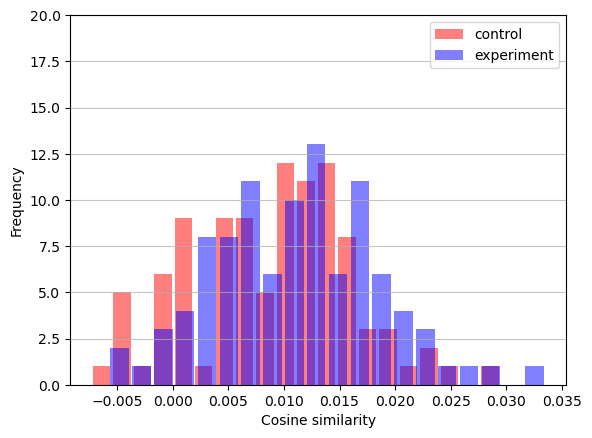

In [15]:
n, bins, patches = plt.hist(x = list_cosim_control,
                            bins = 20, 
                            color = 'red',
                            alpha = 0.5, 
                            rwidth = 0.85,
                            label = 'control',
                            )

n, bins, patches = plt.hist(x = list_cosim_exp,
                            bins = 20, 
                            color = 'blue',
                            alpha = 0.5, 
                            rwidth = 0.85,
                            label = 'experiment',
                            )

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cosine similarity')
plt.ylabel('Frequency')
plt.legend()
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

# 2-dimensional projection

In [22]:
rep_ring = get_representation(ring_lattice, param)
rep_ring_cont = get_representation(ring_lattice, param)
rep_ring_exp = get_representation(ring_missing, param)

Generating walks (CPU: 7): 100%|██████████| 10/10 [00:11<00:00,  1.20s/it]


In [24]:
from sklearn.manifold import TSNE

In [35]:
rep_ring = np.array(rep_ring)
rep_ring_cont = np.array(rep_ring_cont)
rep_ring_exp = np.array(rep_ring_exp)

In [36]:
ring_proj = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(rep_ring)
control_proj = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(rep_ring_cont)
exp_proj = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(rep_ring_exp)

In [42]:
ring_proj.shape

(1000, 2)

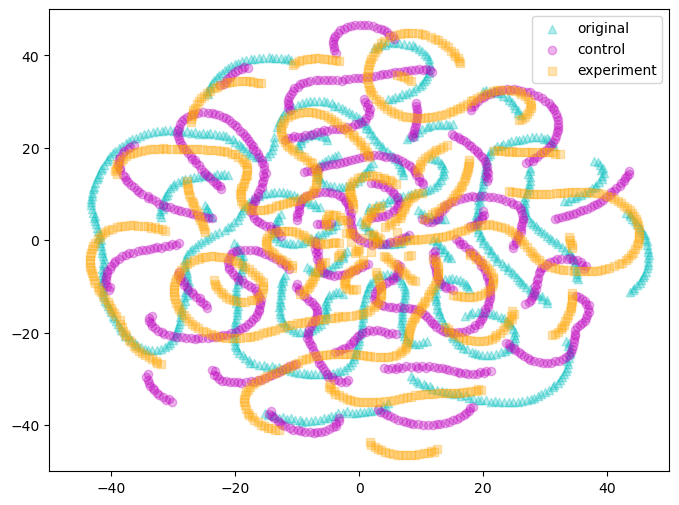

In [84]:
n_point = -1

fig, ax = plt.subplots(figsize = (8, 6))

ax.scatter(ring_proj[:, 0][:n_point], ring_proj[:, 1][:n_point], 
           c = 'c',
           marker = '^',
           alpha = 0.3,
           label = 'original',)
ax.scatter(control_proj[:, 0][:n_point], control_proj[:, 1][:n_point], 
           c = 'm', 
           marker = 'o', 
           alpha = 0.3,
           label = 'control',)
ax.scatter(exp_proj[:, 0][:n_point], exp_proj[:, 1][:n_point],
           c = 'orange', 
           marker = 's',
           alpha = 0.3,
           label = 'experiment',)
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.legend()
plt.show()